# MH of older workers, retirement age and working conditions

# Final datasets

Load libraries

In [1]:
import os
import sys

src_path = os.path.abspath("../")
sys.path.append(src_path)

from utils.common import *
from utils.ewcs import *
from utils.retirement import *
from utils.share import *

import_libraries()

Merge final SHARE and EWCS data to create different datasets

In [3]:
# 3 digits merge on country
merge_share_ewcs("3digits_country.csv", convert_to_3_digits=True)
# 4 digits merge on country
merge_share_ewcs("4digits_country.csv", convert_to_3_digits=False)

In [4]:
folder_path = (
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/"
)
files = os.listdir(folder_path)

for file in files:
    if file.startswith("3digits") or file.startswith("4digits"):
        file_path = os.path.join(folder_path, file)
        data = pd.read_csv(file_path)  # Read the CSV file
        unique_values = data[
            "mergeid"
        ].nunique()  # Count unique values in the 'mergeid' column
        print(f"{file[:-4]} : {unique_values} unique ids")

3digits_year_country : 3699 unique ids
4digits_year_country : 2758 unique ids
4digits_country : 3115 unique ids
3digits_year : 3944 unique ids
4digits_year : 3915 unique ids
3digits_country : 3699 unique ids


In [10]:
df = pd.read_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/3digits_country.csv"
)

In [11]:
len(df)

5016

In [6]:
data = df.groupby("isco").mergeid.nunique().to_frame().reset_index()

In [7]:
data

,isco,mergeid
0,1100,6
1,1112,8
2,1114,4
3,1120,44
4,1211,9
...,...,...
261,9412,21
262,9611,6
263,9621,7
264,9622,1


In [ ]:
data[data.mergeid >= 10]

,isco,mergeid
3,1120,33
7,1219,18
8,1221,11
13,1324,10
19,1345,10
...,...,...
266,9111,38
267,9112,56
276,9329,10
277,9333,15


In [ ]:
data[data.mergeid >= 10].mergeid.sum()

2095

In [ ]:
df = pd.read_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/3digits_year_country.csv"
)

In [ ]:
data = df.groupby("isco").mergeid.nunique().to_frame().reset_index()

In [ ]:
data

,isco,mergeid
0,110,6
1,111,16
2,112,33
3,121,45
4,122,22
...,...,...
113,941,17
114,952,1
115,961,5
116,962,19


In [ ]:
data[data.mergeid >= 10]

,isco,mergeid
1,111,16
2,112,33
3,121,45
4,122,22
6,132,28
...,...,...
110,931,12
111,932,15
112,933,25
113,941,17


In [ ]:
data[data.mergeid >= 10].mergeid.sum()

3290

In [ ]:
df.groupby("isco").mergeid.nunique().value_counts()

mergeid
12     6
1      5
5      5
2      5
4      4
10     4
23     4
19     4
37     4
7      4
13     3
3      3
9      3
15     3
8      3
29     3
22     3
62     2
27     2
73     2
14     2
24     2
33     2
25     2
18     2
17     2
45     2
28     2
63     2
82     1
148    1
11     1
70     1
60     1
42     1
102    1
71     1
30     1
39     1
44     1
57     1
6      1
110    1
55     1
170    1
69     1
51     1
16     1
31     1
47     1
98     1
99     1
72     1
35     1
105    1
32     1
21     1
Name: count, dtype: int64

In [ ]:
len(df)

4310

In [ ]:
df.mergeid.nunique()

3404

In [ ]:
df.groupby("year").mergeid.nunique()

year
2011    1638
2015    2672
Name: mergeid, dtype: int64

In [ ]:
df.groupby(["country", "year"])[
    ["retirement_age", "retirement_age_early", "retirement_age_minimum"]
].min()

retirement_age  retirement_age_early  \
country        year                                         
Austria        2011           60.00                  57.0   
               2015           60.00                  59.0   
Belgium        2011           65.00                  60.0   
               2015           65.00                  60.0   
Czech Republic 2011           57.00                  54.0   
               2015           58.00                  60.0   
Denmark        2011           65.00                   NaN   
               2015           65.00                   NaN   
Estonia        2011           61.00                  58.0   
               2015           62.50                  59.5   
France         2011           61.67                   NaN   
               2015           62.00                   NaN   
Germany        2011           65.00                  63.0   
               2015           65.17                  63.0   
Greece         2015           67.00                  56.0   
Hungary        2011           63.50                  57.0   
Italy          2011           60.00                  60.0   
               2015           63.75                  60.6   
Luxembourg     2015           65.00                  57.0   
Netherlands    2011           65.00                   NaN   
Poland         2011           60.00                   NaN   
               2015           60.67                   NaN   
Portugal       2011           65.00                  55.0   
               2015           66.00                  60.0   
Slovenia       2011           63.00                  58.0   
               2015           65.00                  60.0   
Spain          2011           65.00                   NaN   
               2015           65.25                   NaN   
Sweden         2011           65.00                  61.0   
               2015           65.00                  61.0   
Switzerland    2015           63.00                  62.0   

                     retirement_age_minimum  
country        year                          
Austria        2011                   57.00  
               2015                   59.00  
Belgium        2011                   60.00  
               2015                   60.00  
Czech Republic 2011                   54.00  
               2015                   58.00  
Denmark        2011                   65.00  
               2015                   65.00  
Estonia        2011                   58.00  
               2015                   59.50  
France         2011                   61.67  
               2015                   62.00  
Germany        2011                   63.00  
               2015                   63.00  
Greece         2015                   56.00  
Hungary        2011                   57.00  
Italy          2011                   60.00  
               2015                   60.60  
Luxembourg     2015                   57.00  
Netherlands    2011                   65.00  
Poland         2011                   60.00  
               2015                   60.67  
Portugal       2011                   55.00  
               2015                   60.00  
Slovenia       2011                   58.00  
               2015                   60.00  
Spain          2011                   65.00  
               2015                   65.25  
Sweden         2011                   61.00  
               2015                   61.00  
Switzerland    2015                   62.00

In [ ]:
df.job_status = df.job_status.replace(
    {"Employee": "Private sector employee", "Civil servant": "Public sector employee"}
)
dummy_df = pd.get_dummies(df["job_status"], prefix="Category").astype(int)
dummy_df.describe()

,Category_Private sector employee,Category_Public sector employee,Category_Self-employed
count,4310.000000,4310.000000,4310.000000
mean,0.590487,0.298608,0.110905
std,0.491801,0.457701,0.314051
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


In [ ]:
round(df.groupby("year").jqi_sum.describe(), 2)

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2011,1638.0,452.04,159.90,108.43,348.14,430.12,539.52,1497.24
2015,2672.0,448.50,169.43,90.71,332.27,425.64,526.32,1635.70


In [ ]:
len(df[df.work_horizon_change_minimum > 0]) / len(df)

0.5747099767981438

In [ ]:
df["work_horizon_change_bin"] = (df["work_horizon_change_minimum"] > 0).astype(int)

In [ ]:
df.affective_suffering.describe()

count    4310.000000
mean        0.272854
std         0.445478
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: affective_suffering, dtype: float64

Number of unique IDs: 3404
Number of unique IDs by country:
country
Austria           232
Belgium           562
Czech Republic    248
Denmark           162
Estonia           392
France            207
Germany           305
Greece             35
Hungary            33
Italy             228
Luxembourg         85
Netherlands        20
Poland             58
Portugal           88
Slovenia          297
Spain              19
Sweden            174
Switzerland       259
Name: mergeid, dtype: int64
Number of unique IDs by year:
year
2011    1638
2015    2672
Name: mergeid, dtype: int64

Demographics:
           age   gender  nb_children  yrseducation
count  4310.00  4310.00      4310.00       4310.00
mean     56.24     0.55         1.82         12.71
std       2.97     0.50         1.25          4.34
min      51.00     0.00         0.00          0.00
25%      54.00     0.00         1.00         11.00
50%      56.00     1.00         2.00         13.00
75%      58.00     1.00         2.00         16

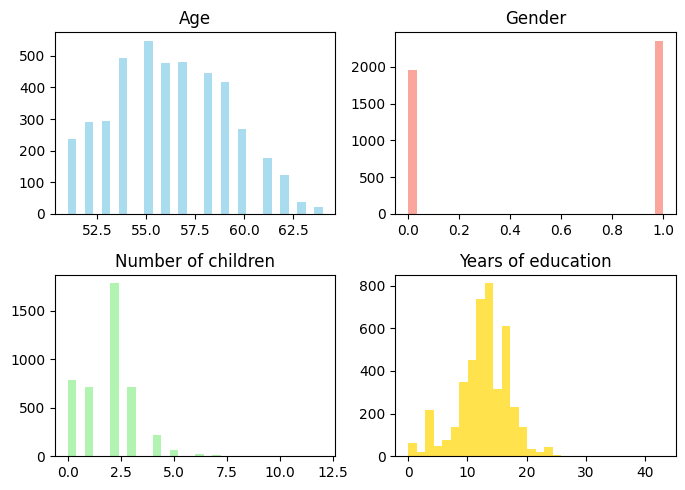


Job Status:
job_status
Private sector employee    0.59
Public sector employee     0.30
Self-employed              0.11
Name: proportion, dtype: float64

Industry of Employment:
industry
Health and social work                          0.14
Education                                       0.13
Other community                                 0.13
Manufacturing                                   0.12
Public administration and defence               0.11
Wholesale and retail trade                      0.11
Transport, storage and communication            0.06
Construction                                    0.05
Financial intermediation                        0.04
Agriculture, hunting, forestry, fishing         0.03
Hotels and restaurants                          0.02
Electricity, gas and water supply               0.02
Real estate, renting and business activities    0.02
Mining and quarrying                            0.01
Other                                           0.01
Name: proportion, 

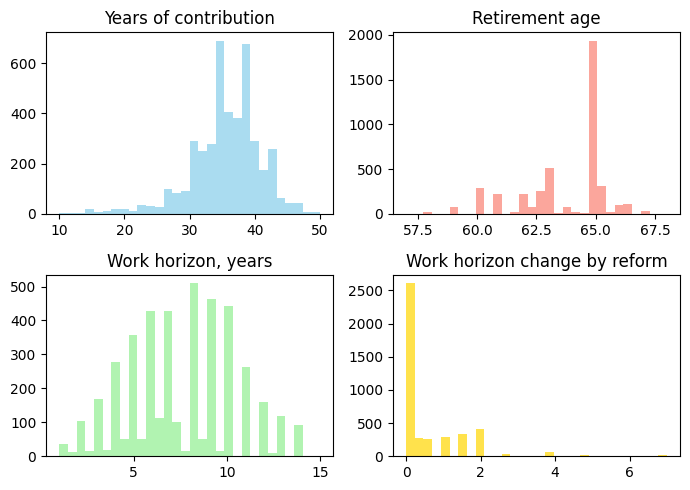


Physical Health and Chronic Diseases:
sphus2  chronic2
0       0           0.39
1       0           0.35
0       1           0.20
1       1           0.05
0       Refusal     0.00
Name: proportion, dtype: float64

Mental Health:
eurodcat
0    0.8
1    0.2
Name: proportion, dtype: float64
EuroD scale score:
eurod
0.0     1090
1.0     1028
2.0      767
3.0      571
4.0      378
5.0      238
6.0      129
7.0       67
8.0       22
9.0       12
10.0       6
11.0       2
Name: count, dtype: int64


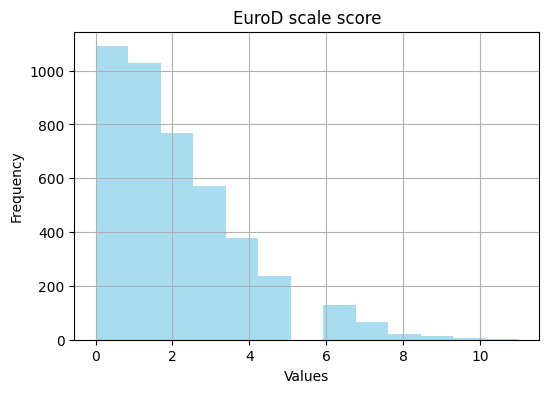


Working Conditions:
       jqi_monthly_earnings_pure  jqi_skills_discretion_pure  \
count                    4310.00                     4310.00   
mean                     1551.77                       59.59   
std                       726.95                       14.16   
min                        81.62                       12.60   
25%                      1079.21                       48.70   
50%                      1437.99                       59.51   
75%                      1841.70                       71.57   
max                     12267.43                       90.91   

       jqi_social_environment_pure  jqi_physical_environment_pure  \
count                      4310.00                        4310.00   
mean                         80.16                          85.17   
std                           6.31                           8.72   
min                          37.50                          35.90   
25%                          76.32                       

In [ ]:
describe_data(df)

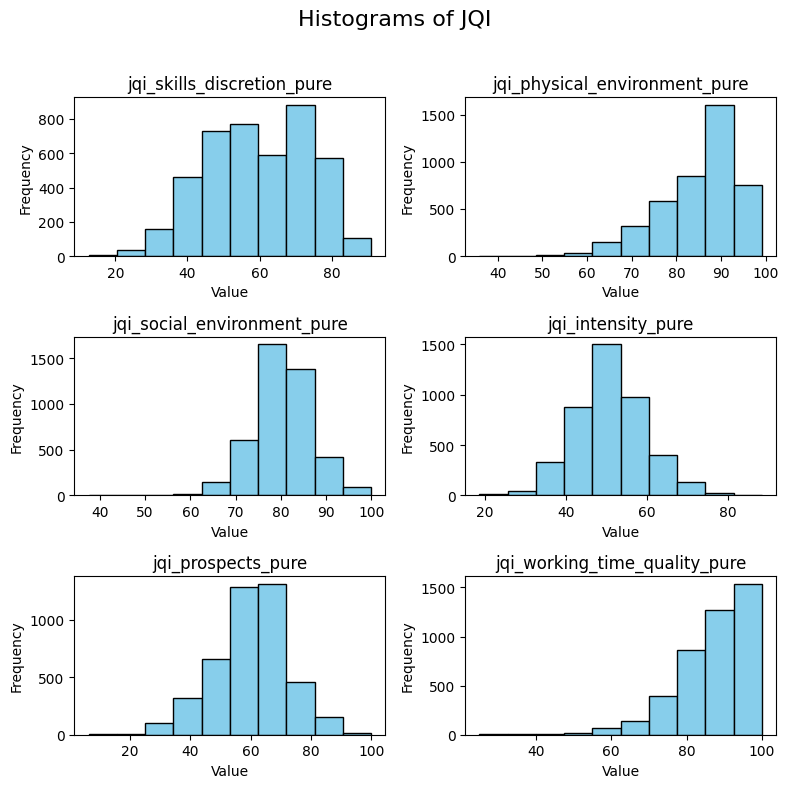

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))
fig.suptitle("Histograms of JQI", fontsize=16)

axes = axes.flatten()

for i, column in enumerate(
    df[
        [
            "jqi_skills_discretion_pure",
            "jqi_physical_environment_pure",
            "jqi_social_environment_pure",
            "jqi_intensity_pure",
            "jqi_prospects_pure",
            "jqi_working_time_quality_pure",
        ]
    ].columns
):
    axes[i].hist(df[column], bins=10, color="skyblue", edgecolor="black")
    axes[i].set_title(column)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()